# 데이터의 종류 및 수집

- 표형식의 데이터 (.csv, .xlsx)
    - Series, DataFrame
- 텍스트 파일 (.txt)
- json file (.json)
- pickle (.pkl, .pickle)

## 표형식의 데이터
- csv 파일 (.csv)  
⇒ *데이터의 크기가 작고 압축이 용이하기 때문에 가장 널리 사용되는 데이터 형식*
    - comma separated value : 필드를 쉼표로 구분한 파일 형식
    - 텍스트 형식이기 때문에 메모장으로 열 수 있으며, 엑셀로도 열 수 있음.
    - cf. tsv : tab separated value, tab으로 구분되어 있는 데이터


- excel 파일 (.xls, .xlsx) 
    - 여러개의 시트로 구성
    - 데이터를 불러올 때 불러올 시트를 설정할 수 있음 (ex. sheet_name='Sheet 2')
    - 여러 sheet를 불러올때는 list로 받으면 됨 (ex. sheet_name=['Sheet 1', 'Sheet 2'])
        - {'Sheet 1' : 데이터프레임1, 'Sheet 2' : 데이터프레임2}인 dictionary 타입으로 return 됨
    
    
- 두 형식 모두 pandas를 통해 DataFrame 형식으로 읽올 수 있음.
    - index_col : 불러온 데이터중 하나의 칼럼을 인덱스로서 설정함
    - usecols : 데이터중 원하는 칼럼만 선별하여 불러옴
        - 로드 후 칼럼을 추출해내는 것보다 메모리를 절약할 수 있다고 함

### csv 파일

#### csv 파일 로드

In [2]:
# 라이브러리 로드
# csv 파일 -> pd.read_csv
# 데이터 프레임으로 저장
'''
import pandas as pd
seoulfloating = pd.read_csv('./data/SeoulFloating.csv')
print(type(seoulfloating))
seoulfloating.head()
'''
import pandas as pd
seoulfloating = pd.read_csv('./data/SeoulFloating.csv')
# .read_csv() 함수 : 현재 디렉토리 -> dta -> SeoulFloating.csv 파일을 읽어와
# DataFrame의 형태로 저장하는 코드이다.
print(type(seoulfloating))
seoulfloating.head()
# .head() 함수 : seoulfloating 데이터프레임의 상위 5개 행을 출력


<class 'pandas.core.frame.DataFrame'>


,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [3]:
# 데이터프레임에서 하나의 열을 가져옴
# 즉, 데이터프레임은 여러개의 Series를 합쳐놓음
'''
print(type(seoulfloating['fp_num']))
seoulfloating['fp_num']
'''

print(seoulfloating['fp_num'])
seoulfloating['fp_num']
# 데이터프레임의 열인 'fp_num'에 접근한다 반환 자료형은 Series이다.


0          19140
1          19950
2          25450
3          27050
4          28880
           ...  
1084795    27620
1084796    56560
1084797    38960
1084798    25420
1084799    38650
Name: fp_num, Length: 1084800, dtype: int64


0          19140
1          19950
2          25450
3          27050
4          28880
           ...  
1084795    27620
1084796    56560
1084797    38960
1084798    25420
1084799    38650
Name: fp_num, Length: 1084800, dtype: int64

#### index_col와 usecols 비교

In [4]:
# index_col :불러온 데이터의 컬럼 중 하나의 열을 인덱스로서 설정
# 칼럼 설정은 인덱스 번호로도, 칼럼 이름으로도 가능하다
pd.read_csv('./data/SeoulFloating.csv',index_col=0).head() 
pd.read_csv('data/SeoulFloating.csv',index_col='date').head()

#pd.read_csv('./data/SeoulFloating.csv',index_col = 0).head()
# 해당 csv 파일을 불러오되, 인덱스행으로 0번째 열을 설정한다.

#pd.read_csv('data/SeoulFloating.csv',index_col = 'data').head()
# 해당 csv 파일을 불러오되, 인덱스행으로 'data' 행을 설정한다.

,hour,birth_year,sex,province,city,fp_num
date,,,,,,
2020-01-01,0,20,female,Seoul,Dobong-gu,19140
2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [5]:
# usecols : 데이터에서 일부 열(칼럼)만 선택해서 로드
# 불러올 칼럼 설정은 인덱스 번호로도, 칼럼 이름으로도 가능함
pd.read_csv('./data/SeoulFloating.csv',usecols=[0,1]).head()
pd.read_csv('data/SeoulFloating.csv',usecols=['date','hour']).head()

#pd.read_csv('./data/SeoulFloating.csv', usecols=[0,1]).head()
# csv파일을 읽어오되 가져올 행을 인덱스번호로써 특정함.
#pd.read_csv('./data/SeoulFloating.csv', usecols=['data','hour']).head()
# csv파일을 읽어오되 가져올 행을 칼럼 이름으로써 특정함.

,date,hour
0,2020-01-01,0
1,2020-01-01,0
2,2020-01-01,0
3,2020-01-01,0
4,2020-01-01,0


#### 실습1. patientInfo 데이터를 데이터프레임으로 읽어오기

In [6]:
# data폴더에 PatientInfo.txt 파일로 있습니다 ! 
patientInfo = pd.read_csv('./data/PatientInfo.txt')
patientInfo.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


#### 실습2. patientInfo 데이터의 patient_id, city, age 열들만 이용하는 데이터프레임 읽어오기

In [7]:
data_patientInfo = pd.read_csv('./data/PatientInfo.txt',usecols=['patient_id', 'city', 'age'])
data_patientInfo.head()

,patient_id,age,city
0,1000000001,50s,Gangseo-gu
1,1000000002,30s,Jungnang-gu
2,1000000003,50s,Jongno-gu
3,1000000004,20s,Mapo-gu
4,1000000005,20s,Seongbuk-gu


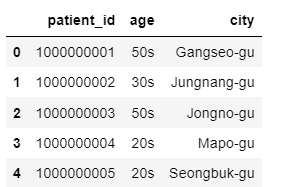

### tsv 파일

In [8]:
# tsv 파일 - read_csv로 읽되, sep의 기본 설정이 ','이므로 '\t'으로 바꾸어줘서 \t 단위로 필드를 구분하여 읽어줌

#pd.read_csv('./data/province data.tsv',sep='\t').head(10)
pd.read_csv('./data/province data.tsv',sep ='\t').head(10)
# sep은 파일을 읽어올 때 필드를 구분하는 '구분자'

,id,year,gdp,unemployment,sexratio
0,11,2006,4.685579,8.800,102
1,11,2007,7.781644,7.475,102
2,11,2008,4.963881,7.675,102
3,11,2009,3.602599,8.225,102
4,11,2010,6.572404,8.450,101
5,11,2011,5.035345,8.325,101
6,11,2012,3.554023,8.300,101
7,11,2013,2.106611,8.650,101
8,11,2014,3.307936,10.325,101
9,11,2015,5.153575,9.275,100


### excel 파일

In [9]:
# excel 파일 - read_excel 함수로 읽음(read_csv 시 오류)
# sheet_name 설정으로 시트를 설정해줄 수 있음
# 숫자로 가능 0은 첫번째 sheet, 1은 두번째 sheet
# pd.read_excel('data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.xlsx',sheet_name=1)
# pd.read_excel('./data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.xlsx',sheet_name='20년 2월').head()

#pd.read_excel('./data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.xlsx',sheet_name=1)
pd.read_excel('./data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.xlsx',sheet_name='20년 2월').head()


,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202002,1호선,동대문,798,8,13638,1759,8461,5858,12050,...,9774,781,3497,0,27,0,0,0,0,20200303
1,202002,1호선,종로3가,116,22,3846,2299,3476,11699,4511,...,3806,1658,1698,0,10,0,0,0,0,20200303
2,202002,1호선,종각,79,3,3146,4391,3467,24993,5274,...,3360,1828,943,3,5,0,1,0,0,20200303
3,202002,1호선,시청,42,0,1952,3560,3300,16533,6242,...,2749,371,692,1,11,0,0,0,0,20200303
4,202002,1호선,서울역,753,16,8656,5881,11027,38332,32573,...,12290,1797,3647,2,126,2,2,0,0,20200303


In [10]:
# default는 첫번째 sheet
#pd.read_excel('./data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.xlsx').head()

pd.read_excel('./data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.xlsx').head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202001,8호선,산성,22,0,4469,865,7308,5246,17343,...,5877,162,1885,1,8,0,0,0,0,20200203
1,202001,중앙선,지평,0,0,0,0,0,0,304,...,0,0,0,0,0,0,0,0,0,20200203
2,202001,중앙선,양평,33,5,1255,73,2190,1173,7599,...,4138,165,1410,0,6,0,0,0,0,20200203
3,202001,중앙선,용문,206,1,786,10,2083,347,3364,...,1818,1,948,0,6,0,0,0,0,20200203
4,202001,중앙선,원덕,28,0,301,3,448,55,992,...,355,3,205,0,0,0,0,0,0,20200203


In [11]:
# read_excel에서 usecols에 들어가는 값은 read_csv와 달리 엑셀의 칼럼 이름과 동일하게 대문자 알파벳으로 지정해줘야 함
# index_col은 똑같이 숫자로 입력함
#pd.read_excel('./data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.xlsx',sheet_name='20년 2월',usecols='A:B,F:G').head()

pd.read_excel('./data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.xlsx',sheet_name='20년 2월',usecols='A:B,F:G').head()

,사용월,호선명,05시-06시 승차인원,05시-06시 하차인원
0,202002,1호선,13638,1759
1,202002,1호선,3846,2299
2,202002,1호선,3146,4391
3,202002,1호선,1952,3560
4,202002,1호선,8656,5881


## 텍스트 데이터 (.txt)
- 표형식의 자료를 txt 형태로 저장한 경우 → read_csv로 로드.
- 일반 텍스트 문자열을 열고자 하는 경우 → with 문을 이용하여 파일 읽기/쓰기 (File I/O)
- 인코딩 관련
    : 텍스트파일을 읽을 때 Unicode Error가 발생하는 경우
    - 기본 인코딩 형식은 'cp949'이며, 오류가 생길경우 'utf-8'시도
    - utf-8도 안될 경우 이모지 등으로 인한 오류 (https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python)

### 표를 담은 텍스트 파일의 경우
- pandas의 read_csv로 로드
- txt파일의 필드 구분이 어떻게 되어있는지 확인하여 sep 설정

In [12]:
# string.txt를 열어봐 필드 구분이 무엇으로 이루어졌는지 확인 한 후, 구분자를 설정해 줌.
#텍스트파일에서 쉼표로 구분 = sep-','
#pd.read_csv('./data/PatientInfo.txt',sep=',').head()

pd.read_csv('./data/PatientInfo.txt',sep = ',').head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [13]:
# default값은 ,임
#pd.read_csv('./data/PatientInfo.txt').head()

pd.read_csv('./data/PatientInfo.txt').head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [14]:
# 서담프로젝트때 사용한 데이터
# |\으로하면 다른 모양이 나옴.
#pd.read_csv('./data/서담.txt',sep='|', index_col = 0).tail()

pd.read_csv('./data/서담.txt',sep ='|',index_col = 0).tail()
# .tail() : 마지막 5개 행을 출력함

,title,header,comment_num,writer,like,upload_date,view,link,borad,text,dislike,comment,date_time,hour,word_token
8214,새해맞이 연게 첫글,NaN,5,익명,35,01/01,785,http://www.ssodam.com//content/813081?prev=245...,연애상담소,다들 올해는 인생의 단짝을 만나용,0,[['네에 ㅠㅠ 올해는 정말 행복하고 싶어요.. 님두 좋은 인연 만나서 행복하세요 ...,2020-01-01 00:24:00,0.0,"[('새해', 'Noun'), ('맞이', 'Noun'), ('연', 'Noun')..."
8215,올해는 행시합격한다,NaN,5,익명,86,01/01,1180,http://www.ssodam.com//content/813062?prev=245...,익게2,토모관 여러분도\n\n\n \n\n \n ...,0,"[['나도 행시 올 해 붙는다!'], ['나도 올해 붙는다!'], ['민특상디 사례...",2020-01-01 00:08:00,0.0,"[('올해', 'Noun'), ('는', 'Josa'), ('행시', 'Noun')..."
8216,??? : 야 올해가 몇년이냐?,NaN,9,익명,127,01/01,1982,http://www.ssodam.com//content/813058?prev=245...,익게2,다들 새해복!,0,"[['좌우로 정렬해주세여'], ['ㅁㅊ ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 적절한 짤 추'], ['...",2020-01-01 00:06:00,0.0,"[('???', 'Punctuation'), (':', 'Punctuation'),..."
8217,2020년 서강의 첫 모습,NaN,5,익명,101,01/01,1931,http://www.ssodam.com//content/813047?prev=245...,익게2,방금 토모관에서 나와서 찍어봤어20대의 절반을 서강과 함께할수 있어서 진심으로 행복...,0,"[['나도 방금 나왔는데 ㅎㅎㅎ 다미 본듯'], ['내년에는 좋은 소식만 들리자!!...",2020-01-01 00:04:00,0.0,"[('2020년', 'Number'), ('서강', 'Noun'), ('의', 'J..."
8218,2020년 파이팅!!,NaN,15,익명,168,01/01,1335,http://www.ssodam.com//content/813032?prev=245...,익게2,모두들 파이팅!!,0,"[['올 첫글 ㅋㅋ'], ['아 너 뭔데 나보다 일찍 썼냐ㅡㅡ추천이나 먹어라'], ...",2020-01-01 00:00:00,0.0,"[('2020년', 'Number'), ('파이팅', 'Noun'), ('!!', ..."


#### 실습3. 서담 데이터의 title, like, view 열들만 이용하는 데이터프레임 읽어오기

In [15]:
# 아래와 같은 결과가 나오면 됩니다!!
ssodam = pd.read_csv("./data/서담.txt",sep = '|', usecols = ['title','like','view'])
ssodam

,title,like,view
0,도대체가 학교의 기준이 무엇인지 이해가 안됩니다,32,429
1,학교 시설물 관련 부서 전화번호 적을테니 내일부터 전화 한통씩하자,38,577
2,걍 서강사이버대학으로 하자,42,564
3,학교 너무 빡친다,106,1830
4,박미선 누님 결혼식날 비 오셨죠?,40,824
...,...,...,...
8214,새해맞이 연게 첫글,35,785
8215,올해는 행시합격한다,86,1180
8216,??? : 야 올해가 몇년이냐?,127,1982
8217,2020년 서강의 첫 모습,101,1931


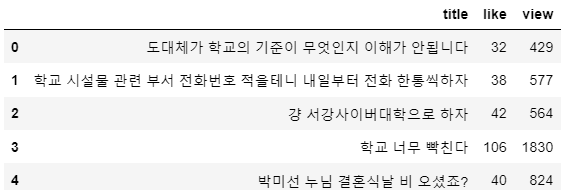

### 일반 텍스트 문자열인 경우


- Python을 활용하여 텍스트분석을 하고자 할 때
- with문을 사용하여 읽기/쓰기
- 파일 열기모드 
    1. w : 파일에 내용을 새로 쓸 때 
    2. r : 파일을 읽기만 할 때 
    3. a : 파일의 마지막에 새로운 내용을 추가할 때
- 읽기 함수
    1. read : 파일 내용 전체를 문자열로 돌려줌
    2. readline : 파일의 첫번째 줄부터 반복하여 한줄씩 읽음
    3. readlines : 파일의 모든 줄을 읽어서 각각의 줄을 원소로 갖는 리스트로 돌려줌
- 관련 링크 : https://wikidocs.net/26

#### read

In [16]:
# with문을 활용하여 txt파일 읽어오기
# open('파일 이름', '모드') 로 사용
# 이경우 r을 이용해 읽기모드로 파일을 불러옴
'''
with open('./data/robinson_crusoe_chapter_1.txt','r') as f:
    rc = f.read()
print(rc)
'''
#error가 뜰 경우에 긁어서 구글링하면 나옵니다(익숙해져야함)
with open('./data/robinson_crusoe_chapter_1.txt','r') as fp:
    rc = fp.read()
print(rc)

CHAPTER I?START IN LIFE


I was born in the year 1632, in the city of York, of a good family,
though not of that country, my father being a foreigner of Bremen, who
settled first at Hull.  He got a good estate by merchandise, and leaving
off his trade, lived afterwards at York, from whence he had married my
mother, whose relations were named Robinson, a very good family in that
country, and from whom I was called Robinson Kreutznaer; but, by the
usual corruption of words in England, we are now called?nay we call
ourselves and write our name?Crusoe; and so my companions always called
me.

I had two elder brothers, one of whom was lieutenant-colonel to an
English regiment of foot in Flanders, formerly commanded by the famous
Colonel Lockhart, and was killed at the battle near Dunkirk against the
Spaniards.  What became of my second brother I never knew, any more than
my father or mother knew what became of me.

Being the third son of the family and not bred to any trade, my head
began to

#### write

In [17]:
# with 문을 활용하여 txt파일 써오기
# 인자에 w를 사용함
'''
my_words = 'Insight 9기 화이팅 :)'
with open('my_word.txt','w') as f:
    f.write(my_words)
'''
my_words = '인사이트 9기 화이팅 :)'
with open('my_word.txt','w') as fp:
    fp.write(my_words)


In [18]:
'''
with open('my_word.txt','r') as f:
    sogang = f.read()
print(sogang)
'''
with open('my_word.txt','r') as fp:
    sogang = fp.read()
print(sogang)

인사이트 9기 화이팅 :)


#### add

In [19]:
# with 문에 'a'인자로 파일의 마지막에 새로운 내용 추가
'''
with open('my_word.txt','a') as f:
    f.write('\n' + my_words)
'''
'''
#\n = 줄바꿈
with open('my_word.txt','r') as f:
    sogang = f.read()
print(sogang)
'''

with open('my_word.txt','a') as fp: # append 모드
    fp.write('\n'+my_words)
with open('my_word.txt','r') as fp:
    sogang = fp.read()
print(sogang)

인사이트 9기 화이팅 :)
인사이트 9기 화이팅 :)


#### 실습3. txt 파일을 열어 하고싶은 말 쓰고 저장하기(open 이용)

In [20]:
mywords = '하고 싶은 말'
with open('my_word.txt', 'a') as f:
    f.write('\n'+mywords)

with open('my_word.txt','r') as f:
    insight = f.read()
    
print(insight)

인사이트 9기 화이팅 :)
인사이트 9기 화이팅 :)
하고 싶은 말


### 데이터 저장
- pandas의 데이터프레임을 저장
- 데이터프레임.to_csv 함수를 이용

In [21]:
# seoulfloating 데이터의 1,2번째 컬럼을 불러옴
#seoulfloating = pd.read_csv('./data/SeoulFloating.csv',usecols=[0,1])
#seoulfloating.head()

seoulfloating = pd.read_csv('./data/SeoulFloating.csv',usecols=[0,1])
seoulfloating.head()

,date,hour
0,2020-01-01,0
1,2020-01-01,0
2,2020-01-01,0
3,2020-01-01,0
4,2020-01-01,0


In [22]:
# csv 파일로 저장
# index = False 지정하면 인덱스는 저장 안함, default는 True
#seoulfloating.to_csv('seoulfl.csv', index = False)

seoulfloating.to_csv('seoulfl.csv',index=False)

In [23]:
# txt 파일로도 저장가능!
# 이경우 ,로 구분되어 있음

seoulfloating.to_csv('seoulfl.txt', index = False)

In [24]:
# 서담데이터의 제목과 조회수 컬럼을 불러옴

#ssodam = pd.read_csv('./data/서담.txt',sep='|', usecols=['title', 'view'])
#ssodam.head()

ssodam = pd.read_csv('./data/서담.txt',sep = '|',usecols = ['title','view'])
#type(ssodam)
ssodam.head()

,title,view
0,도대체가 학교의 기준이 무엇인지 이해가 안됩니다,429
1,학교 시설물 관련 부서 전화번호 적을테니 내일부터 전화 한통씩하자,577
2,걍 서강사이버대학으로 하자,564
3,학교 너무 빡친다,1830
4,박미선 누님 결혼식날 비 오셨죠?,824


In [25]:
# csv 파일로 저장

ssodam.to_csv('ssodam.csv', sep='|', index = False)

> 읽어보기~

## json 파일(.json)


- javascript기반 텍스트 데이터 포맷 중 하나
- 다른 언어 간의 교환이 용이함
- python에서는 json이라는 내장 모듈을 활용하여 읽고 불러들이며, 파이썬 내부에서는 dictionary의 자료형으로써 읽고 쓸 수 있음

In [26]:
data = {

    "First Name": "Insight",
    "Last Name": "Sogang",
    "Age": 25,
    "University": "Sogang University",
    "Courses": 
        {
            "Classes": [
                "Big Data Design",
                "Marketing Analytics",
                "Business Statistics"
            ],
            "Major": "Business"
        }
}

### json 파일 로드(load) 및 저장(dump)

In [27]:
# 모듈 import
#print(data)
#import json
# json파일로 데이터 저장하기
# json.dump(데이터 이름, 파일) 으로 파일을 데이터 이름으로 저장함
#with open('student_data.json','w') as json_file: # 'student_data.json' 파일을 쓰기 모드로 열고 파일객체 json_file 선언
#    json.dump(data, json_file) #데이터를 파일 객체에 저장함.
    
import json
with open('student_data.json','w') as json_file:
    json.dump(data,json_file)
#json_file : 파일 객체
#json : 모듈 이름

#json.dump(데이터,파일)의 형식

dump라는 함수 이용 < == 데이터를 저장해주는 역할 \
load ==> 데이터 읽어주는 거

In [28]:
# json.load(파일) 을 이용해 json 파일을 불러들임
#with open('student_data.json','r') as json_file:
#    json_data = json.load(json_file)

with open('student_data.json','r') as json_file:
    json_data = json.load(json_file)

In [29]:
json_data

{'First Name': 'Insight',
 'Last Name': 'Sogang',
 'Age': 25,
 'University': 'Sogang University',
 'Courses': {'Classes': ['Big Data Design',
   'Marketing Analytics',
   'Business Statistics'],
  'Major': 'Business'}}

### json 형식의 데이터를 dataframe으로 변환

In [30]:
# json 파일 읽어오기
# 한글이 적혀있는 국내 데이터의 경우 encoding을 'utf-8'로 설정함 (csv, xls, txt 파일 모두!) 
'''
with open('./data/서울시 월별 평균 대기오염도 정보.json','r',encoding='utf-8') as json_file:
    json_data = json.load(json_file)
'''
with open('./data/서울시 월별 평균 대기오염도 정보.json','r',encoding = 'utf-8') as json_file:
    json_data = json.load(json_file)
    

In [31]:
json_data

{'DESCRIPTION': {'PM25': '초미세먼지(㎍/㎥)',
  'MSRDT_MT': '측정월',
  'PM10': '미세먼지(㎍/㎥)',
  'SO2': '아황산가스(ppm)',
  'NO2': '이산화질소농도(ppm)',
  'CO': '일산화탄소농도(ppm)',
  'O3': '오존농도(ppm)',
  'MSRSTE_NM': '측정소명'},
 'DATA': [{'co': 0.5,
   'so2': 0.003,
   'msrdt_mt': '202004',
   'o3': 0.041,
   'no2': 0.024,
   'pm10': 58,
   'pm25': 31,
   'msrste_nm': '강남구'},
  {'co': 0.5,
   'so2': 0.003,
   'msrdt_mt': '202004',
   'o3': 0.033,
   'no2': 0.037,
   'pm10': 71,
   'pm25': 28,
   'msrste_nm': '강남대로'},
  {'co': 0.4,
   'so2': 0.003,
   'msrdt_mt': '202004',
   'o3': 0.044,
   'no2': 0.017,
   'pm10': 68,
   'pm25': 32,
   'msrste_nm': '강동구'},
  {'co': 0.4,
   'so2': 0.004,
   'msrdt_mt': '202004',
   'o3': 0.031,
   'no2': 0.038,
   'pm10': 76,
   'pm25': 26,
   'msrste_nm': '강변북로'},
  {'co': 0.4,
   'so2': 0.003,
   'msrdt_mt': '202004',
   'o3': 0.047,
   'no2': 0.027,
   'pm10': 79,
   'pm25': 36,
   'msrste_nm': '강북구'},
  {'co': 0.4,
   'so2': 0.004,
   'msrdt_mt': '202004',
   'o3': 0.041,
   

In [32]:
json_data['DATA']

[{'co': 0.5,
  'so2': 0.003,
  'msrdt_mt': '202004',
  'o3': 0.041,
  'no2': 0.024,
  'pm10': 58,
  'pm25': 31,
  'msrste_nm': '강남구'},
 {'co': 0.5,
  'so2': 0.003,
  'msrdt_mt': '202004',
  'o3': 0.033,
  'no2': 0.037,
  'pm10': 71,
  'pm25': 28,
  'msrste_nm': '강남대로'},
 {'co': 0.4,
  'so2': 0.003,
  'msrdt_mt': '202004',
  'o3': 0.044,
  'no2': 0.017,
  'pm10': 68,
  'pm25': 32,
  'msrste_nm': '강동구'},
 {'co': 0.4,
  'so2': 0.004,
  'msrdt_mt': '202004',
  'o3': 0.031,
  'no2': 0.038,
  'pm10': 76,
  'pm25': 26,
  'msrste_nm': '강변북로'},
 {'co': 0.4,
  'so2': 0.003,
  'msrdt_mt': '202004',
  'o3': 0.047,
  'no2': 0.027,
  'pm10': 79,
  'pm25': 36,
  'msrste_nm': '강북구'},
 {'co': 0.4,
  'so2': 0.004,
  'msrdt_mt': '202004',
  'o3': 0.041,
  'no2': 0.016,
  'pm10': 67,
  'pm25': 26,
  'msrste_nm': '강서구'},
 {'co': 0.4,
  'so2': 0.005,
  'msrdt_mt': '202004',
  'o3': 0.027,
  'no2': 0.023,
  'pm10': 76,
  'pm25': 27,
  'msrste_nm': '공항대로'},
 {'co': 0.5,
  'so2': 0.004,
  'msrdt_mt': '202004',

In [33]:
# dictionary 데이터를 dataframe으로

#pd.DataFrame(json_data['DATA']).head(10)

pd.DataFrame(json_data['DATA']).head(10)

,co,so2,msrdt_mt,o3,no2,pm10,pm25,msrste_nm
0,0.5,0.003,202004,0.041,0.024,58.0,31.0,강남구
1,0.5,0.003,202004,0.033,0.037,71.0,28.0,강남대로
2,0.4,0.003,202004,0.044,0.017,68.0,32.0,강동구
3,0.4,0.004,202004,0.031,0.038,76.0,26.0,강변북로
4,0.4,0.003,202004,0.047,0.027,79.0,36.0,강북구
5,0.4,0.004,202004,0.041,0.016,67.0,26.0,강서구
6,0.4,0.005,202004,0.027,0.023,76.0,27.0,공항대로
7,0.5,0.004,202004,0.035,0.025,65.0,26.0,관악구
8,0.5,0.005,202004,0.035,0.015,79.0,28.0,관악산
9,0.5,0.003,202004,0.040,0.019,76.0,33.0,광진구


## pickle파일 (.pickle, .pkl)


- 리스트나 클래스같은 텍스트가 아닌 자료형은 일반적인 파일 입출력 방법으로는 데이터를 저장하거나 불러올 수 없다.
- 파이썬에서는 이와 같은 텍스트 이외의 자료형을 파일로 저장하기 위하여 pickle이라는 모듈을 제공한다.
- 바이트 형식의 자료형이기 때문에 연산속도가 더 빠른 장점이 있다.
- 머신러닝에서 "모델" 자체를 저장하고 불러올 수 있다.

In [34]:
#모듈 import
import pickle

### list 데이터

In [35]:
# list 데이터
my_list = ['insight', 'sogang']

# 바이트 형식으로 작성하기 때문에 write의 w에 b(byte)를 붙여 'wb'로
# 방법은 json과 동일함
'''
with open('my_list.pickle', 'wb') as p:
    pickle.dump(my_list, p)
'''
with open('my_list.pickle','wb') as p:
    pickle.dump(my_list, p)
    
# 바이트 형식으로 읽으려고 하기 때문에 read의 r에 b(byte)를 붙여 'rb'로
'''
with open('my_list.pickle','rb') as p:
    my_list = pickle.load(p)
'''
with open('my_list.pickle','rb') as p:
    my_list = pickle.load(p)
my_list                                

['insight', 'sogang']

### numpy 데이터

In [36]:
# numpy 데이터도 가능

import numpy as np

array = np.array([[3,6,3,1],[2,3,4,7]])

In [37]:
# 데이터 저장

with open('myarray.pickle', 'wb') as p:
    pickle.dump(array, p)
    #pickle.dump(데이터, 파일명)
# 데이터 불러오기

with open('myarray.pickle','rb') as p:
    array = pickle.load(p)
    #변수 = pickle.load(파일명)
    
array

array([[3, 6, 3, 1],
       [2, 3, 4, 7]])

* numpy 관련 추가 학습용 자료 https://www.youtube.com/watch?v=mirZPrWwvao

## OS 라이브러리를 활용한 데이터 로드

- os 모듈은 운영체제에서 제공하는 정보를 제공하거나 운영체제의 기능을 사용할 수 있는 방법을 제공한다.



In [38]:
import os 
# 현재 Jupyter가 실행중인 경로를 확인
os.getcwd()
# .getcwd() : get current working directory

'C:\\Users\\ahrah\\Desktop\\학교\\2023 봄\\INSIGHT\\jupyter_insight\\결석 후\\Session3일차 실습'

In [39]:
#해당 디렉토리에 있는 모든 파일이름을 리스트로 반환
os.listdir()

['.ipynb_checkpoints',
 'data',
 'myarray.pickle',
 'my_list.pickle',
 'my_word.txt',
 'seoulfl.csv',
 'seoulfl.txt',
 'ssodam.csv',
 'student_data.json',
 '읽기, 전처리 실습.ipynb']

In [40]:
# 반복문과 조건문을 활용해서 필요한 파일 명을 추출할 수 있습니다. 
'''
txtList = []
for x in os.listdir('./data'):
    if x.endswith('txt'):
            txtList.append(x)
'''
txtList = []
for x in os.listdir('./data'):
    if x.endswith('txt'):
        txtList.append(x)
        
print(txtList)

['PatientInfo.txt', 'robinson_crusoe_chapter_1.txt', 'ssodam.txt', '서담.txt']


In [41]:
#현재 위치한 디렉토리 위치 변화
os.chdir("./data")
# .chdir() : 현재 작업디렉토리를 변경하는 메소드
os.getcwd()

'C:\\Users\\ahrah\\Desktop\\학교\\2023 봄\\INSIGHT\\jupyter_insight\\결석 후\\Session3일차 실습\\data'

In [42]:
#sodam=pd.read_csv(txtList[-1],sep='|', usecols=['title','like','view'])
sodam = pd.read_csv(txtList[-1], sep = '|', usecols = ['title','like','view'])
sodam

,title,like,view
0,도대체가 학교의 기준이 무엇인지 이해가 안됩니다,32,429
1,학교 시설물 관련 부서 전화번호 적을테니 내일부터 전화 한통씩하자,38,577
2,걍 서강사이버대학으로 하자,42,564
3,학교 너무 빡친다,106,1830
4,박미선 누님 결혼식날 비 오셨죠?,40,824
...,...,...,...
8214,새해맞이 연게 첫글,35,785
8215,올해는 행시합격한다,86,1180
8216,??? : 야 올해가 몇년이냐?,127,1982
8217,2020년 서강의 첫 모습,101,1931


## Raw String 활용

파일 위치를 가져올시 파이썬에서 바로 활용할 수 없고 수정을 거쳐야 합니다. 위의 data 폴더의 위치를 가져오면 다음과 같습니다.<br>
__"C:\Users\js953\Desktop\INSIGHT\INSIGHT 8기\INSIGHT_Session2(Pandas, 수집방법)\data"__ <br><br>
이를 파이썬에서 활용하기 위해서는 <br>
__"C:/Users/js953/Desktop/INSIGHT/INSIGHT 8기/INSIGHT_Session2(Pandas, 수집방법)/data__" 혹은 <br>
탈출문자(escape)를 활용하여 __"C:\\Users\\js953\Desktop\\INSIGHT\INSIGHT 8기\\INSIGHT_Session2(Pandas, 수집방법)\\data__" 와 같이 기입해야 합니다. <br><br>

이러한 문제를 쉽게 활용하기 위해 __Raw String "r"__을 활용합니다.

위와 같이 파일 경로에 r을 붙으면 가져온 파일 경로를 파이썬 문법을 따르지 않고 활용할 수 있습니다!<br><br>

Raw String 참고 : https://seong6496.tistory.com/93

----------

________________________________________

# 전처리란?

**`전처리`**
: 데이터를 분석의 목적에 맞게 가공하는 일련의 작업 과정
- Forbes에서 인용한 CrowdFlower의 설문 결과에 따르면 데이터 분석가는 업무 시간 중 80% 정도를 데이터 수집 및 전처리 과정에 사용한다고 합니다.

   - 데이터 전처리는 보통 다음의 순서로 진행합니다.
       - **`데이터 셋 확인`** => **`결측값 처리`** => **`이상값 처리`** => **`Feature Engineering`**

        - feature engineering이란? 
        - domain knowledge를 이용해 특징을 추출하는 것. 
        - 예를 들어, PCA, Feature selection 등등...

# `단계 1` - **데이터 셋 확인**
- 분석하고자 하는 데이터 셋과 친해지는 단계입니다. 데이터 셋에 대해 아래 두 가지 확인 작업을 하게 됩니다.<br><br>
 - **변수확인**
 - **RAW 데이터 확인**
 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [44]:
# 중고 자동차 데이터 셋 불러오기
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)

- info를 통해 데이터 프레임에 대한 개괄적인 정보확인(결측치와 데이터 타입, 변수 확인)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

- non-null은 결측치가 아닌것
- df.isnull().sum() 도 많이 쓰임

In [46]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [47]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [48]:
# 만약 전체 columns을 보고 싶다면 pandas에서 옵션을 수정한다

pd.set_option('display.max_columns', None)
display(df)
pd.set_option('display.max_columns', 20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [49]:
#df.value_counts()

In [50]:
df["num-of-cylinders"].value_counts()
# 'num-of-cylinders' 열에 있는 값들의 빈도수를 반환함.

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [51]:
df.value_counts().to_frame()

0
symboling normalized-losses make          fuel-type aspiration num-of-doors body-style  drive-wheels engine-location wheel-base length width height curb-weight engine-type num-of-cylinders engine-size fuel-system bore stroke compression-ratio horsepower peak-rpm city-mpg highway-mpg price   
-2        103               volvo         gas       std        four         sedan       rwd          front           104.3      188.8  67.2  56.2   2912        ohc         four             141         mpfi        3.78 3.15   9.5               114        5400     23       28          12940  1
 1        ?                 bmw           gas       std        four         sedan       rwd          front           103.5      189.0  66.9  55.7   3055        ohc         six              164         mpfi        3.31 3.19   9.0               121        4250     20       25          24565  1
          168               toyota        gas       std        two          hatchback   rwd          front           94.5       168.7  64.0  52.6   2300        dohc        four             98          mpfi        3.24 3.08   9.4               112        6600     26       29          9538   1
                                                                            sedan       rwd          front           94.5       168.7  64.0  52.6   2169        ohc         four             98          2bbl        3.19 3.03   9.0               70         4800     29       34          8058   1
                                                                                                                                                    2265        dohc        four             98          mpfi        3.24 3.08   9.4               112        6600     26       29          9298   1
...                                                                                                                                                                                                                                                                                               ..
 0        91                toyota        gas       std        four         wagon       4wd          front           95.7       169.7  63.6  59.1   3110        ohc         four             92          2bbl        3.05 3.03   9.0               62         4800     27       32          8778   1
          93                mercedes-benz diesel    turbo      two          hardtop     rwd          front           106.7      187.5  70.3  54.9   3495        ohc         five             183         idi         3.58 3.64   21.5              123        4350     22       25          28176  1
          ?                 audi          gas       turbo      two          hatchback   4wd          front           99.5       178.2  67.9  52.0   3053        ohc         five             131         mpfi        3.13 3.40   7.0               160        5500     16       22          ?      1
                            bmw           gas       std        four         sedan       rwd          front           103.5      189.0  66.9  55.7   3230        ohc         six              209         mpfi        3.62 3.39   8.0               182        5400     16       22          30760  1
 3        ?                 volkswagen    gas       std        two          convertible fwd          front           94.5       159.3  64.2  55.6   2254        ohc         four             109         mpfi        3.19 3.40   8.5               90         5500     24       29          11595  1

[205 rows x 1 columns]

In [52]:
for i in df.columns:
    print(i, df[i].value_counts())
 

symboling  0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
normalized-losses ?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64
make toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu

In [53]:
# "?" 를 NaN 값으로 대체한다. 
#df.replace("?", np.nan, inplace = True)
df.replace('?', np.nan, inplace = True)
#'?' 문자열을 NaN 값으로 대체.
display(df.head())
#display(df.isnull().sum())
df.info()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

- describe 함수: 데이터의 개수(count), 평균(mean), 표준편차(std), 분위수(25,50,75%), 최대최소(max,min)를 보여줌
- 기본 수치 기술통계량 확인 가능 

In [54]:
#df.describe()
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<AxesSubplot:>

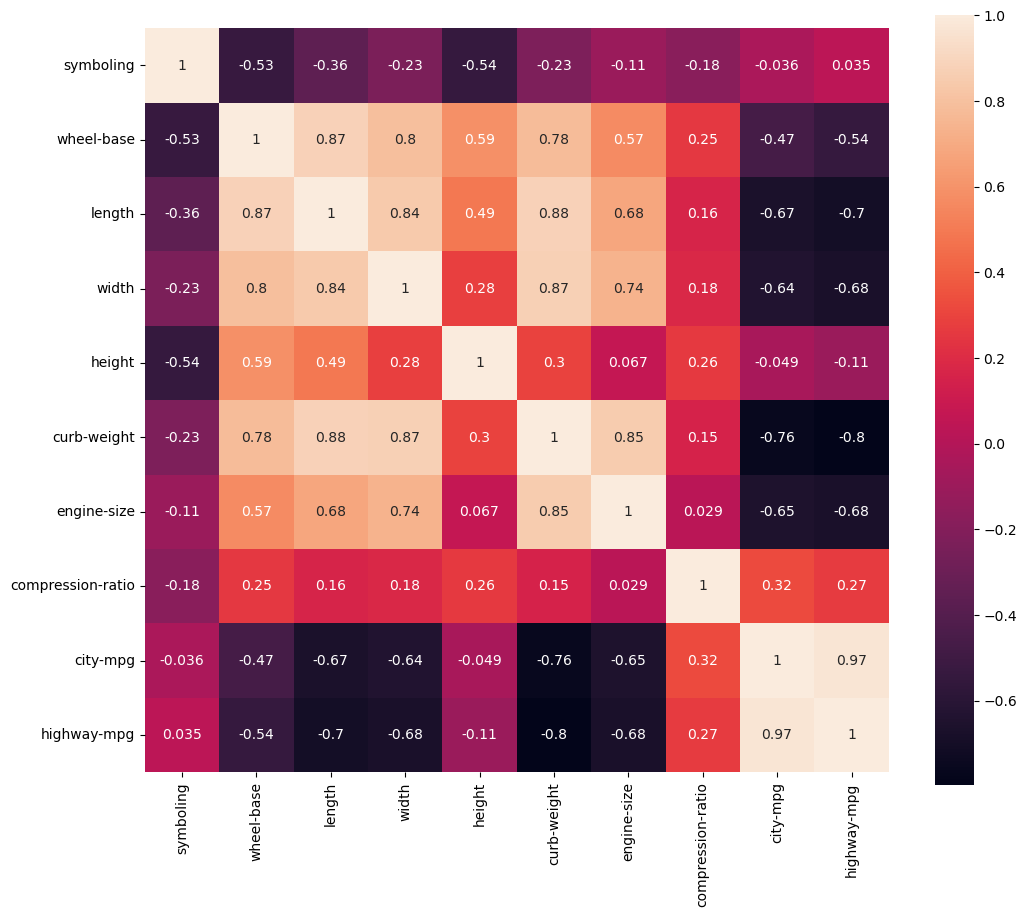

In [55]:
# 변수간 상관관계 확인
'''
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),square = True, annot = True)
'''
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),square=True, annot = True)
# Seaborn 라이브러리. DataFrame의 상관관계를 시각화함.
# figsize : 그래프의 크기
# sns.heatmap() : DataFrame의 상관관계 행렬을 시각화
# square = True : 각 셀의 크기가 정사각형으로 그려지도록
# annot=True : 각 셀에 값(두 변수 간 상관관계)을 표시하도록 

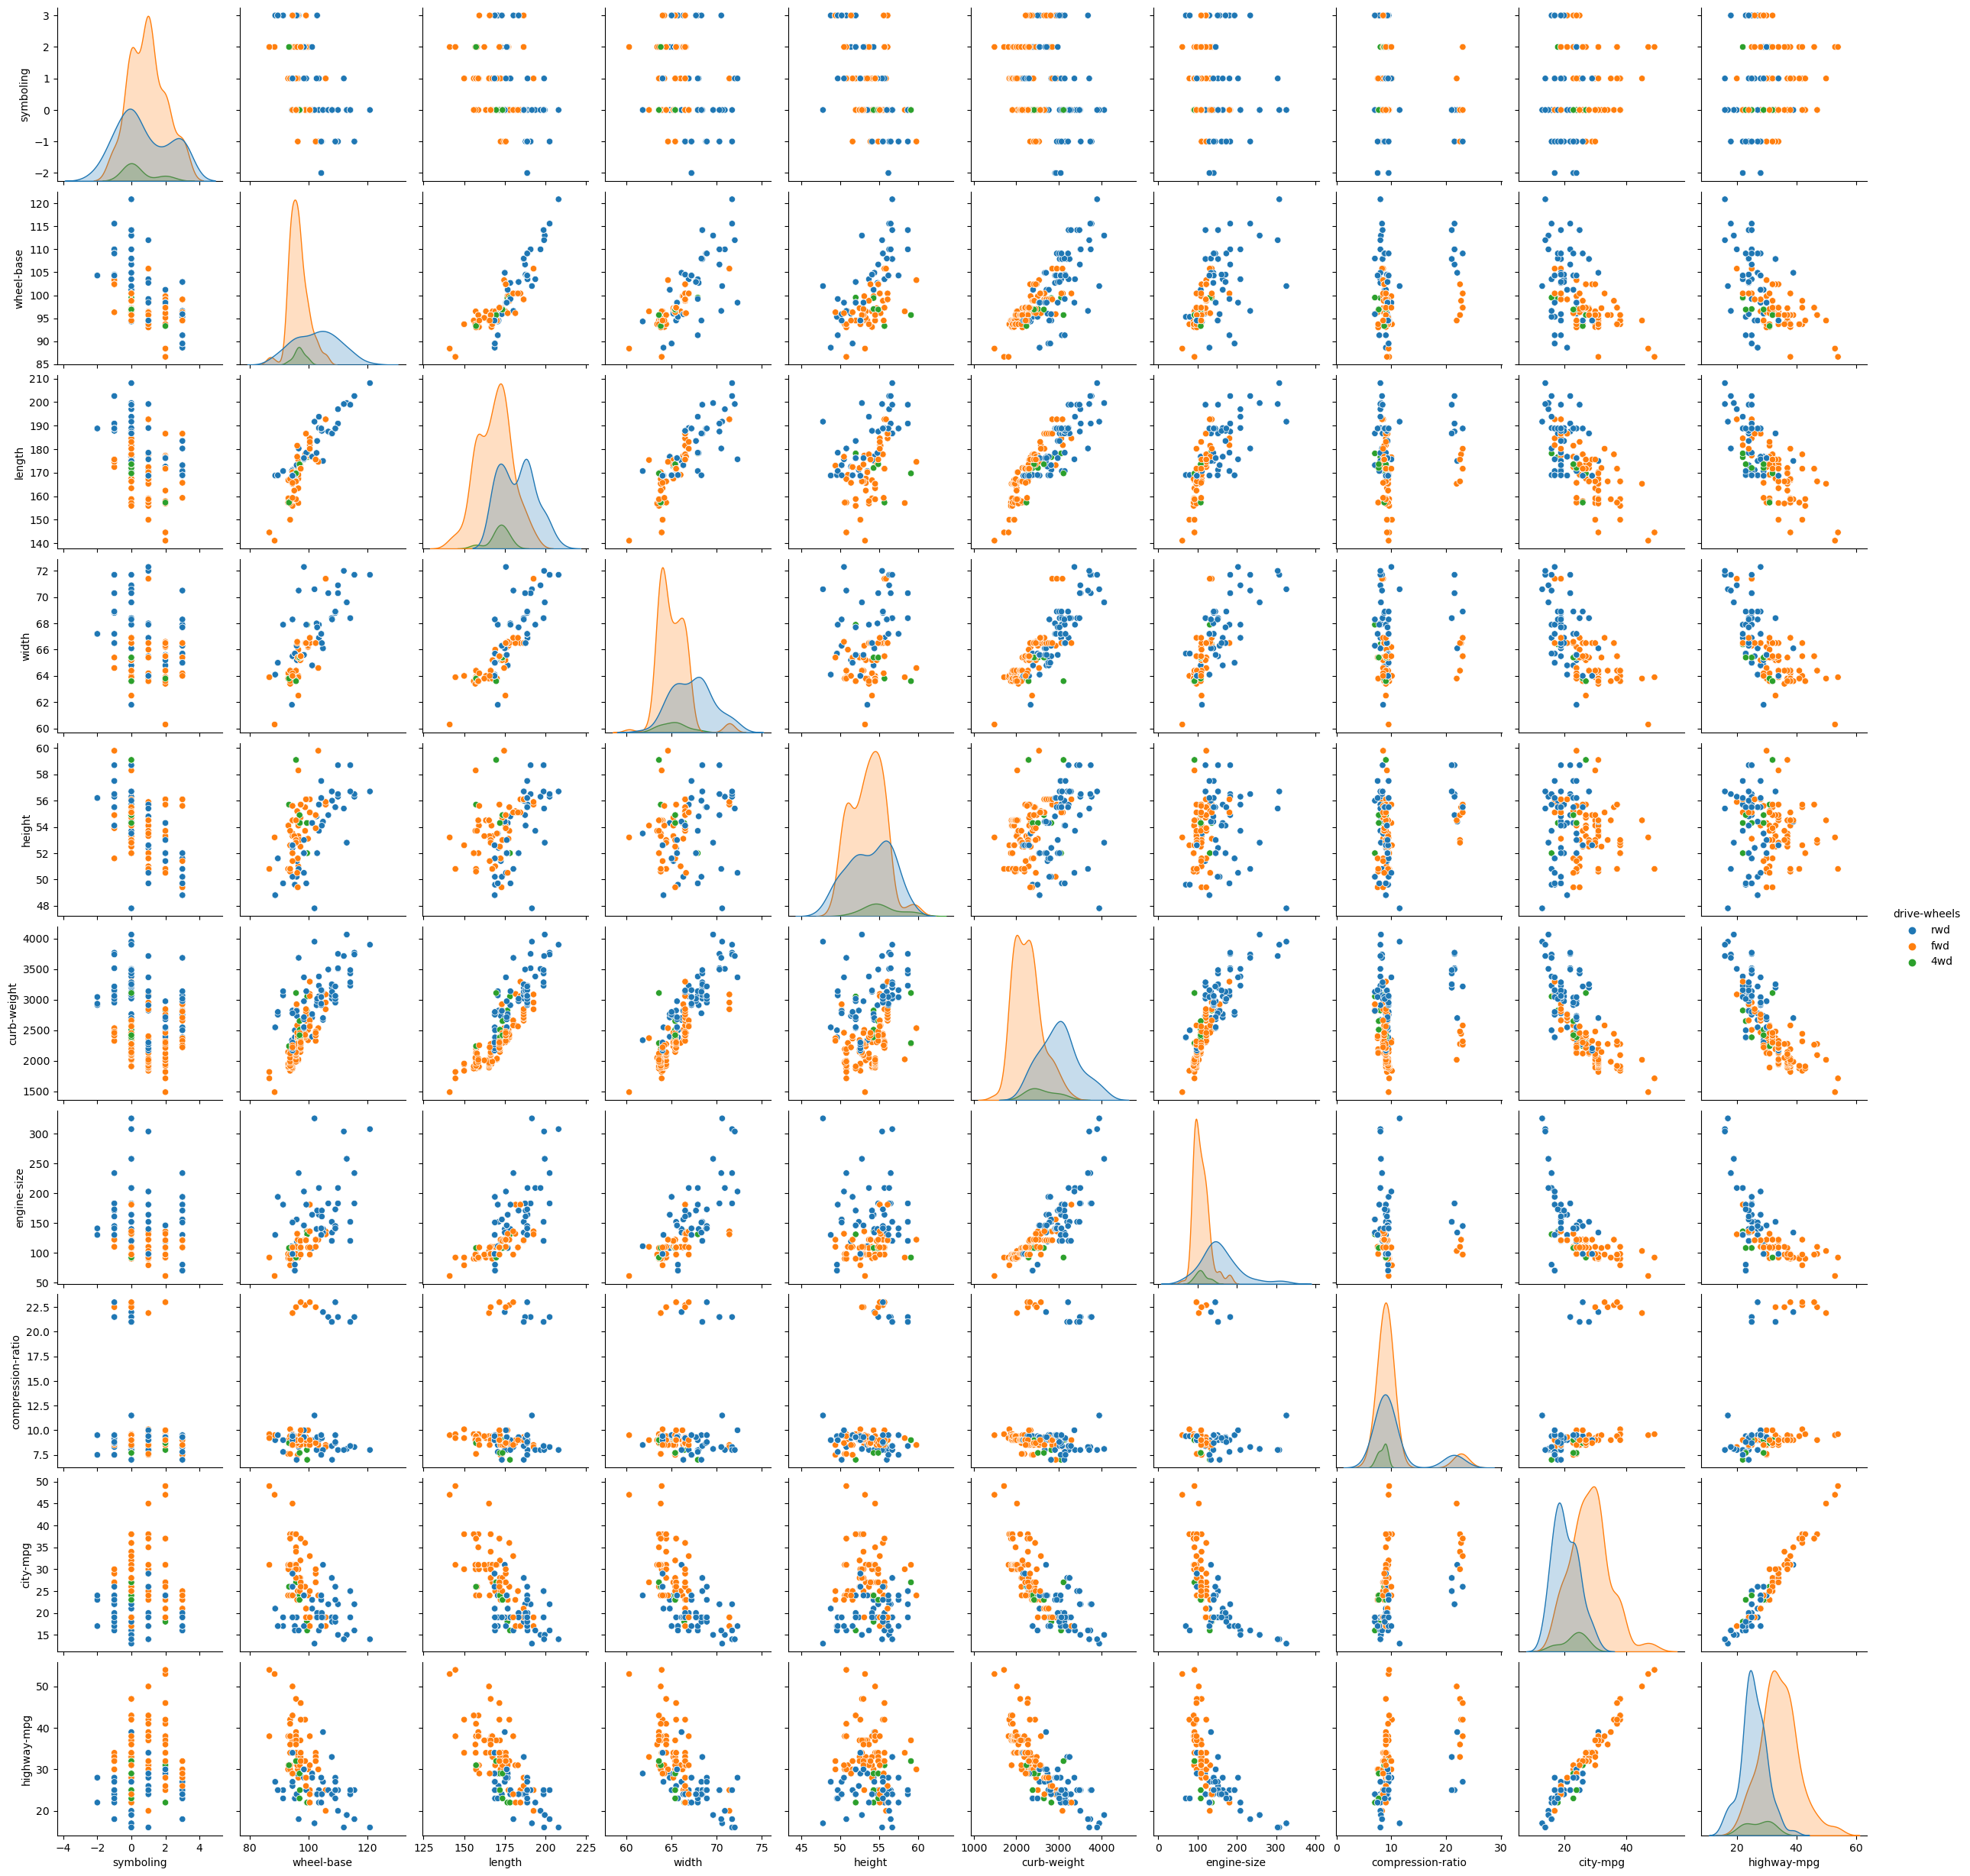

In [56]:
# hue를 통해 비교하고 싶은 값도 지정할 수 있다
sns.pairplot(df, hue = 'drive-wheels')
#Seaborn 라이브러리. 
#변수 쌍간의 산점도를 그림
#hue : 범주형 변수를 지정하여 그룹화하고 색상을 분류함.
#'drive-wheels' 열의 값을 사용해 데이터를 그룹화 함
#'drive-wheels' 변수의 분포와 함께 변수 간 상관관계를 한눈에 확인할 수 있게 함


# `단계 2` - **결측값 처리**

## 삭제

- 1) 결측값이 발생한 모든 관측치를 삭제하거나 (**전체 삭제**, Listwise Deletion),<br> 2) 데이터 중 모델에 포함시킬 변수들 중 결측값이 발생한 모든 관측치를 삭제하는 방법(**부분 삭제**)이 있습니다.<br><br>
- **전체 삭제**는 간편한 반면 관측치가 줄어들어 모델의 **유효성**이 낮아질 수 있고,<br> **부분 삭제**는 모델에 따라 변수가 제각각 다르기 때문에 **관리 Cost**가 늘어난다는 단점이 있습니다. <br><br>
- 삭제는 결측값이 **무작위**로 발생한 경우에 사용합니다. 
    - 결측값이 무작위로 발생한 것이 아닌데 관측치를 삭제한 데이터를 사용할 경우 왜곡된 모델이 생성될 수 있습니다.


> <부분삭제는 좀더 데이터를 보존하는 방식>


In [61]:
#df_1 = df.copy()
#df_1.isnull().sum()
df_1 = df.copy()
df_1.isnull().sum()
#df_1 데이터프레임의 모든 원소에 대해 결측값 여부를
#True, False로 반환한 후, sum() 메서드를 이용해 각 열별 결측값의 개수를 구함.


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Dropna 대표적 파라미터
***DataFrame.dropna(axis=0/1, how='any'/'all', subset=[col1, col2, ...], inplace=True/False)***
- axis = 0/1 or 'index'/'columns'\
 0 or 'index' -> NaN 값이 포함된 row를 drop (default 값입니다.) \
 1 or 'columns' -> NaN 값이 포함된 column을 drop \
  \
- how = 'any'/'all' \
any -> row 또는 column에 NaN값이 1개만 있어도 drop (default 값입니다.) \
all -> row 또는 column에 있는 모든 값이 NaN이어야 drop \
\
- inplace = True/False \
True -> dropna가 적용된 DataFrame 자체에 dropna를 적용\
False -> dropna가 적용된 DataFrame는 그대로 두고 dropna를 적용한 DataFrame을 return\
 \
- subset = [col1, col2, ...] \
subset을 명시하지 않으면 DataFrame 전체(모든 column & 모든 row)에 대해 dropna를 진행 \
subset을 명시하면 subset에 적힌 column값에 대해서만 dropna를 진행 

In [62]:
# NaN값을 가진 로우 삭제하기 ===> 전체삭제

len_before = len(df_1)

# dropna(how='any') : 하나의 데이터라도 결측값이면 행을 삭제

# horsepower column의 결측치가 1개라도 있으면, 해당하는 row를 삭제
len_after = len(df_1.dropna(subset=["horsepower"], how='any', axis=0))
# subset=['horsepower'] : 특정 열에서만 결측값을 찾음
# how = 'any' : 한 개 이상 결측값이 포함된 행은 제거함.
# axis =0 : 행을 제거함
print('전체 행의 개수:',len_before)
print('사라지는 행의 개수:',len_before-len_after)
print('남는 행의 개수:',len_after) 

전체 행의 개수: 205
사라지는 행의 개수: 2
남는 행의 개수: 203


In [63]:
# horsepower", "stroke" 컬럼에 값이 없는 레코드를 삭제한다.
df_1.dropna(subset=["horsepower","stroke"],
            how='any', 
            axis=0, 
            inplace=True)

#df_1 데이터프레임에서 horsepower와 stroke 열 중에서 하나라도 결측값을 포함하고 있는 
#행(row)을 삭제하고,이를 원본 데이터프레임에 바로 적용(inplace=True)함

# 레코드를 삭제했기 때문에 인덱스를 리셋한다. 
# inplace = True (리셋 인덱스): 계속해서 유지해야함
df_1.reset_index(drop=True, inplace=True)
display(df_1.head())
print(len(df_1))

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


199


In [64]:
# horsepower와 stroke 모두 결측치가 있는 row는 없다.
# 따라서 dropna(how = 'all')로 했을 때, 삭제된 row가 없다

len_before = len(df)
len_after = len(df.dropna(subset=["horsepower","stroke"], how='all', axis=0))

'''how 매개변수는 어떤 조건에서 행(row)을 삭제할 것인지를 설정하는 매개변수입니다. 
"any"는 해당 행(row)에 결측값이 하나라도 있으면 삭제하겠다는 뜻입니다.
"all"로 설정하면 해당 행(row)의 모든 값이 결측값인 경우에만 삭제합니다.'''

print('전체 행의 개수:',len_before)
print('사라지는 행의 개수:',len_before - len_after)
print('남는 행의 개수:',len_after) 

전체 행의 개수: 205
사라지는 행의 개수: 0
남는 행의 개수: 205



## 다른 값으로 대체 (평균, 최빈값, 중간값)

- 결측값이 발생한 경우 다른 관측치의 평균, 최빈값, 중간값 등으로 대체할 수 있습니다.<br><br>
- 1) 모든 관측치의 평균값 등으로 대체하는 **일괄 대체 방법**<br> 2) 범주형 변수를 활용해 유사한 유형의 평균값 등으로 대체하는 **유사 유형 대체 방법**이 있습니다. 
    - (예 – 남자 키의 평균 값 173, 여자 키의 평균 값 158인 경우, 남자 관측치의 결측 값은 173으로 대체)<br><br>
- 결측값의 발생이 다른 변수와 관계가 있는 경우 대체 방법이 유용한 측면은 있지만, 유사 유형 대체 방법의 경우 어떤 범주형 변수를 유사한 유형으로 선택할 것인지는 자의적으로 선택하므로 모델이 왜곡될 가능성이 존재합니다.

> 유사 유형 대체 방법: 다른 데이터 기반으로 더 자세한 정보 부여.

In [66]:
#주어진 데이터의 missing data의 인덱스
idx = df_1[df_1['normalized-losses'].isnull()].index
# .isnull() 연산 이후 boolean Series가 반환되는데,
# 이를 df_1 에 적용하여 True인 행의 인덱스를 반환한다
# 결측치가 어떤 행에 있는지 알 수 있음
print(idx)
df_1.loc[idx].head(10)

Int64Index([  0,   1,   2,   5,   7,   9,  14,  15,  16,  17,  43,  44,  45,
             46,  48,  49,  59,  62,  67,  69,  70,  71,  78,  79,  80, 105,
            106, 109, 110, 120, 122, 123, 124, 125, 175, 183, 185, 186, 187],
           dtype='int64')


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [67]:
# index 추출 예시
# 조건문을 통해 True False를 뽑아낸 뒤, 데이터프레임에 이를 적용해 index를 뽑아낸다
print(df_1['symboling'] > 2)

# df_1['normalized-losses'].isnull() 또한 같은 원리다
print('-------------------------------------------')
print(df_1['normalized-losses'].isnull())

0       True
1       True
2      False
3      False
4      False
       ...  
194    False
195    False
196    False
197    False
198    False
Name: symboling, Length: 199, dtype: bool
-------------------------------------------
0       True
1       True
2       True
3      False
4      False
       ...  
194    False
195    False
196    False
197    False
198    False
Name: normalized-losses, Length: 199, dtype: bool


In [68]:
# 평균 값으로 결측치 대체
print(df[['normalized-losses']].info(),'\n\n')
print(df[['normalized-losses']].astype("float").info())

# print(df['normalized-losses'].mean())

# 데이터 타입을 바꾸어 줘야 함! 실수형 데이터로 바꿔주기.

avg_norm_loss = df['normalized-losses'].astype("float").mean()

print(f'\n\n대체할 평균 값은: {avg_norm_loss} 입니다')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   normalized-losses  164 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB
None


대체할 평균 값은: 122.0 입니다


In [69]:
# fillna 로 결측치 입력
df_1['normalized-losses'] = df_1['normalized-losses'].fillna(avg_norm_loss)

df_1.loc[idx].head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
14,1,122.0,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,122.0,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,122.0,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,122.0,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [70]:
# price 값을 각 make 별 평균으로 대체
#유사유형대체법

check_index = df_1[df_1['price'].isnull()].index
# 'price' 열이 null인 레코드들의 index를 뽑고
display(df_1[['make','price']].loc[check_index])
# df_1[['make','price']] 부분데이터프레임에서 'price' 값이 null인 레코드를 보여라

,make,price
9,audi,NaN
44,isuzu,NaN
45,isuzu,NaN
125,porsche,NaN


In [71]:
# 유사유형대체법
df_1['price'] = df_1['price'].astype("float")
df_1_make_avg = df_1.groupby("make")['price'].transform("mean")
# make별로 그룹을 지정.
# .transform('mean') : 각 그룹별 가격의 평균값을 계산
df_1['price'].fillna(df_1_make_avg, inplace=True)
# 'price' 열에 접근하여 df_1_make_avg로써 null을 대체함
print(df_1_make_avg)

display(df_1[['make','price']].loc[check_index])

#df_1.groupby("make")['price']. ~~~

0      15498.333333
1      15498.333333
2      15498.333333
3      17859.166667
4      17859.166667
           ...     
194    18063.181818
195    18063.181818
196    18063.181818
197    18063.181818
198    18063.181818
Name: price, Length: 199, dtype: float64


,make,price
9,audi,17859.166667
44,isuzu,8916.500000
45,isuzu,8916.500000
125,porsche,31400.500000


## 실습4

In [72]:
np.random.seed(123)
ex_1 = pd.DataFrame({"col_1": np.random.randn(7),
                     "col_2": np.random.randn(7)})
ex_1.loc[8] = np.nan
ex_1

,col_1,col_2
0,-1.085631,-0.428913
1,0.997345,1.265936
2,0.282978,-0.866740
3,-1.506295,-0.678886
4,-0.578600,-0.094709
5,1.651437,1.491390
6,-2.426679,-0.638902
8,NaN,NaN


- ex_1에서 col_1, col_2의 결측치를 각 칼럼의 평균으로 채우기

In [80]:
avg_norm_loss1 = ex_1['col_1'].astype("float").mean()
avg_norm_loss2 = ex_1['col_2'].astype("float").mean()

#**************************
#**************************

ex_1['col_1'].fillna(avg_norm_loss1, inplace = True)
ex_1['col_2'].fillna(avg_norm_loss2, inplace = True)

print(ex_1)

      col_1     col_2
0 -1.085631 -0.428913
1  0.997345  1.265936
2  0.282978 -0.866740
3 -1.506295 -0.678886
4 -0.578600 -0.094709
5  1.651437  1.491390
6 -2.426679 -0.638902
8 -0.380778  0.007025


## 실습5

In [82]:
raw_data = {'first_name': ['Jason','Tina', 'Jake', 'Amy'],
            'last_name': ['Miller','Ali', 'Milner', 'Cooze'],
            'age': [42,36, 24, 73],
            'sex': ['m','f', 'm', 'f'],
            'preTestScore': [4,np.nan, 2, 3],
            'postTestScore': [25,np.nan, 62, 70]}
df_ex2 = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df_ex2

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42,m,4.0,25.0
1,Tina,Ali,36,f,NaN,NaN
2,Jake,Milner,24,m,2.0,62.0
3,Amy,Cooze,73,f,3.0,70.0


### preTestScore의 결측치를 preTestScore의 "전체" 평균으로 채우기

In [88]:
preTestScore_mean = df_ex2['preTestScore'].astype("float").mean()
#*******
df_ex2['preTestScore'].fillna(preTestScore_mean, inplace =True)
df_ex2

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42,m,4.0,25.0
1,Tina,Ali,36,f,3.0,NaN
2,Jake,Milner,24,m,2.0,62.0
3,Amy,Cooze,73,f,3.0,70.0


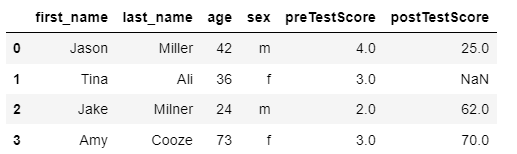

### postTestScore의 결측치를 성별별 평균으로 채우기

In [89]:
postTestScore_mean = df_ex2.groupby('sex')['postTestScore'].transform("mean")

df_ex2['postTestScore'].fillna(postTestScore_mean, inplace =True)
df_ex2
# 성별별 평균 == 성별로 그룹화후 평균 계산

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42,m,4.0,25.0
1,Tina,Ali,36,f,3.0,70.0
2,Jake,Milner,24,m,2.0,62.0
3,Amy,Cooze,73,f,3.0,70.0


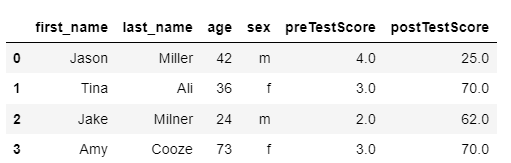

## 예측값 삽입

- 결측값이 없는 관측치를 트레이닝 데이터로 사용해서 결측값을 예측하는 모델을 만들고,<br>이 모델을 통해 결측값이 있는 관측 데이터의 **결측값을 예측하는 방법**입니다. <br><br>
- Regression이나 Logistic regression을 주로 사용합니다. <br><br>
- 대체하는 방법보다 조금 덜 자의적이나 결측값이 **다양한 변수**에서 발생하는 경우, 사용 가능 변수 수가 적어 적합한 모델을 만들기 어렵고<br> 또 이렇게 만들어 진 모델의 **예측력이 낮은 경우**에는 사용하기 어려운 방법입니다.

In [94]:
#'num-of-doors' 컬럼에서 값이 없는 레코드를 최빈값으로 대체한다. 

print("Value counts :")
print(df_1['num-of-doors'].value_counts())

# 최빈값 확인
print('\n방법 1:', df_1['num-of-doors'].mode().values)
print('방법 2:', df_1['num-of-doors'].value_counts().idxmax())
# idxmax() : 가장 빈도가 높은 값의 인덱스

Value counts :
four    115
two      84
Name: num-of-doors, dtype: int64

방법 1: ['four']
방법 2: four


- idxmax: 가장 많이 나온 index로 반환해줌.

In [95]:
#최빈값으로 대체
#check_index = df_1[df_1['num-of-doors'].isnull()].index
check_index = df_1[df_1['num-of-doors'].isnull()].index

print('결측치 처리 전')
display(df_1[["num-of-doors"]].loc[check_index])

#df_1["num-of-doors"].replace(np.nan, "four", inplace=True)
df_1['num-of-doors'].replace(np.nan, 'four', inplace = True)

print('------------------------------------------')
print('결측치 처리 후')
display(df_1[["num-of-doors"]].loc[check_index])

결측치 처리 전


,num-of-doors


------------------------------------------
결측치 처리 후


,num-of-doors


In [98]:
df_1.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

> 결측치는 끝났당!

# `단계 3` - **이상치 처리(Handling Outliers)**
## 이상치 확인

- **이상치**란 기존 데이터들과 거리가 먼 데이터이다.
     - 예를 들어, 이런값들이(234,234, 267, 1, 200, 245, 300, 199, 250, 8999, 245)이 세트로 주어졌다고 하면,<br> 
이 1과 8999는 **이상치(outlier)**라고 할 수 있다.

 

In [99]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


### 시각화를 통해 확인 (with Boxplot)

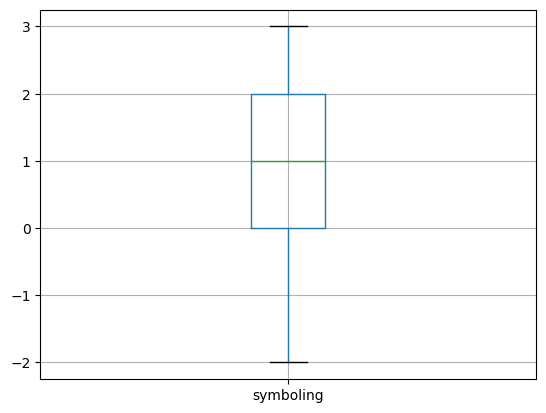

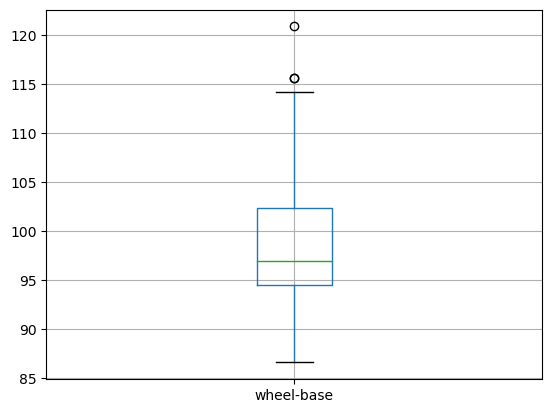

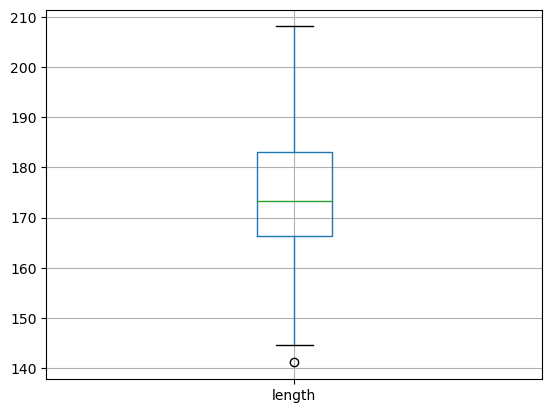

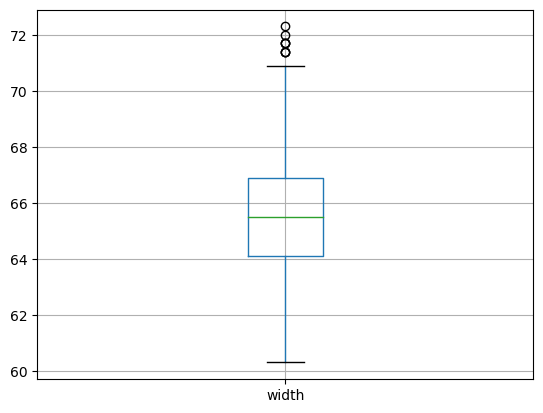

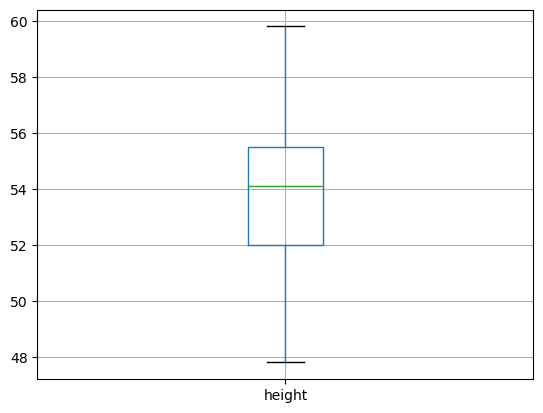

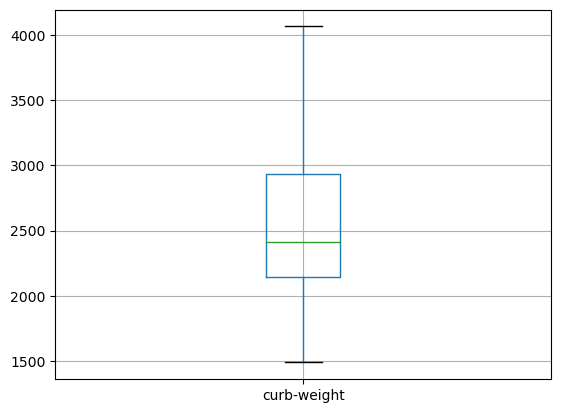

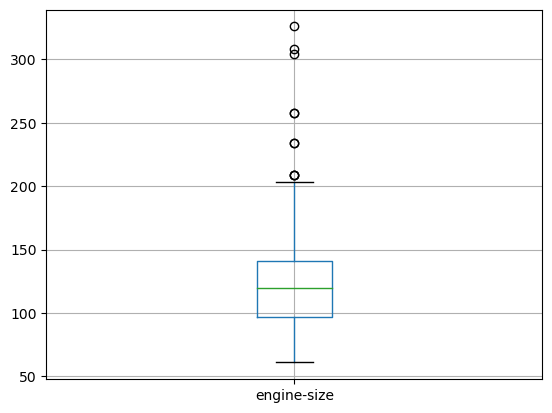

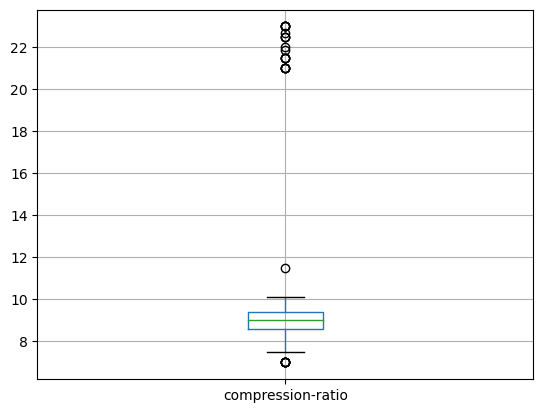

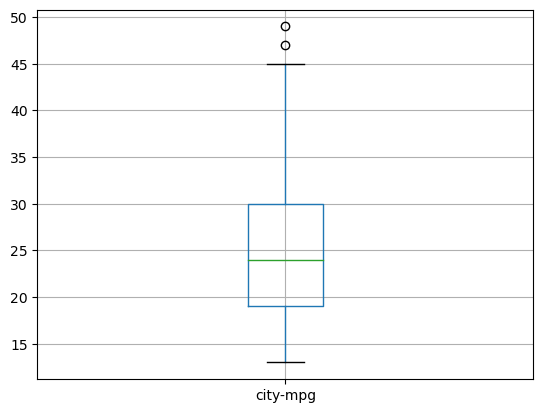

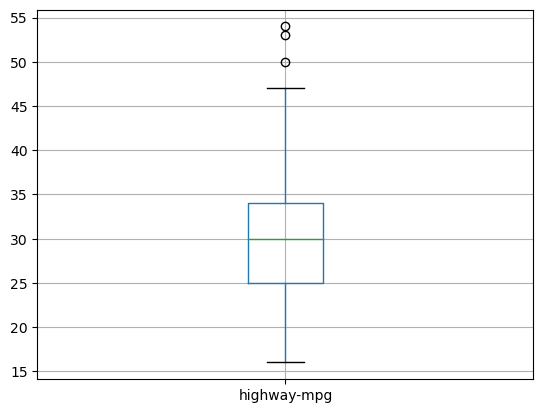

In [100]:
'''for i in df.describe().columns:
    df[[i]].boxplot()
    plt.show()'''
for i in df.describe().columns:
    df[[i]].boxplot()
    plt.show()

### Tukey Fences

- **Tukey Fences**는 **사분위 범위**(IQR, interquartile range)를 기반으로 한다.<br><br>
- **IQR**은 세번째 사분위에서 첫번째 사분위를 뺀 값이며(IQR = Q3 - Q1) 이다.<br><br>
아래 그림은 짝수와 홀수 값을 가진 데이터셋의 IQR를 구하는 과정이다<br>



Tukey Fence에선 아래 두 가지로 이상치를 판단한다.
- Q1 - (1.5 * IQR) 미만
- Q3 + (1.5 * IQR) 초과

In [101]:
def find_outlier_by_Tukey(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    print(f'lower_bound는 {lower_bound.round(3)}, upper_bound는 {upper_bound.round(3)} 입니다')
    
    # np.where은 데이터의 인덱스를 반환
    mask = np.where((data>upper_bound) | (data<lower_bound)) 
    return mask

In [102]:
# example
x = np.random.randn(1000)
find_outlier_by_Tukey(x)

lower_bound는 -2.695, upper_bound는 2.647 입니다


(array([ 17, 181, 245, 532, 717, 750, 836, 926], dtype=int64),)

In [105]:
# np.where과 DF.index 비교

def find_outlier_by_Tukey_DF(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    print(f'lower_bound는 {lower_bound.round(3)}, upper_bound는 {upper_bound.round(3)} 입니다')
    
    # np.where을 Dataframe.index로 바꿔서 쓸 수도 있다
    mask = data[(data['feature'] > upper_bound) | (data['feature'] < lower_bound)].index
    return mask

x_df = pd.DataFrame(x, columns=['feature'])
find_outlier_by_Tukey_DF(x_df)

lower_bound는 -2.695, upper_bound는 2.647 입니다


Int64Index([17, 181, 245, 532, 717, 750, 836, 926], dtype='int64')

In [106]:
# 이상치 확인
x[find_outlier_by_Tukey(x)]

lower_bound는 -2.695, upper_bound는 2.647 입니다


array([-2.79858911, -3.23105501,  2.95862545, -2.78811288,  3.57157922,
       -2.7944723 ,  2.76660307, -3.16705533])

### Z-score(표준점수)

- **표준점수** = (데이터 포인트 - 데이터의 평균)/ 데이터의 표준편차<br><br>

- 표준점수를 구하면 변환한 데이터 **평균값이 0**이 되고 **표준편차는 1**이 된다.<br><br>

- 해석
    - Z-Score = 0 => 데이터 포인트가 중간(평균이다)
    - Z-Score = 1 => 데이터 포인트가 평균보다 1 표준편차가 높다<br>
    - Z-score의 값이 **3보다 크거나 -3보다 작은 것**은 **이상치**라고 판단할 수 있다.

In [107]:
def find_outlier_z(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    
    z_score = [(y-mean)/std for y in data]

    masks = np.where(np.abs(z_score)>threshold)
    
    return masks
x[find_outlier_z(x)]

array([-3.23105501,  2.95862545,  3.57157922, -3.16705533])

## 이상치 처리
### 단순삭제

- 이상값이 **Human error**에 의해서 발생한 경우에는 해당 관측치를 **삭제**하면 됩니다. <br>
- 단순 오타나, 주관식 설문 등의 비현실적인 응답, 데이터 처리 과정에서의 오류 등의 경우에 사용합니다.
> 이상치 데이터 제거하기 (이상치가 아닌 데이터만 채택하기) \
> 결측치 삭제와 유사

### 다른 값으로 대체

- 절대적인 관측치의 **숫자가 작은 경우**, 단순삭제를 통해 이상치를 제거하면 관측치의 절대량이 작아지는 문제가 발생합니다.<br>
- 이런 경우 이상값이 Human error에 의해 발생했더라도 관측치를 삭제하는 대신 다른 값(평균 등)으로 **대체**하거나, 결측값과 유사하게 다른 변수들을 사용해서 예측 모델을 만들고, 이상값을 **예측**한 후 해당 값으로 대체하는 방법도 사용할 수 있습니다.

### 변수화

- 이상값이 **자연 발생**한 경우, 단순 삭제나 대체의 방법을 통해 수립된 모델은 설명/예측하고자 하는 현상을 잘 설명하지 못할 수도 있습니다. 

### 리샘플링
- 자연발생한 이상값을 처리하는 또 다른 방법으로는 해당 **이상값을 분리**해서 모델을 만드는 방법이 있습니다.




# `단계 4` - **Feature Engineering**

- **Feature Engineering**이란, **기존**의 변수를 사용해서 데이터에 **정보를 추가**하는 일련의 과정입니다.<br>새로 관측치나 변수를 추가하지 않고도 기존의 데이터를 보다 **유용**하게 만드는 방법론입니다.






In [111]:
data = pd.read_csv("../data/penguins_size_modified1.csv")
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [112]:
data = data.astype({'species':'category','island':'category','sex':'category'})

# 데이터 타입을 변경 시켜줘야 함. (object => 카테고리)
print(data.dtypes)
display(data)

# 데이터 타입을 범주형(category)으로 변환하는 코드. 
# 범주형으로 변환하면 분석과 메모리절약에 유리하다.

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## DUMMY
- Binning 과는 반대로 **범주형 변수를 연속형 변수로 변환**하기 위해 사용합니다.

In [113]:
categorical_data = data[['species','island','sex']]
categorical_data_copy = categorical_data.copy()

categorical_data

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,FEMALE
4,Adelie,Torgersen,MALE
...,...,...,...
328,Gentoo,Biscoe,FEMALE
329,Gentoo,Biscoe,FEMALE
330,Gentoo,Biscoe,MALE
331,Gentoo,Biscoe,FEMALE


### Label Encoding

In [115]:
categorical_data["species_cat"] = categorical_data["species"].cat.codes
# 'species' 열을 범주형데이터로 변환하고,
# .cat : 범주형데이터의 특수한 속성
# .codes : 범주형 데이터의 코드값

# 'species_cat' 열은 'species' 열의 각 범주형데이터가 가지는 고유한 코드값을 가짐
print(categorical_data["species_cat"])
print('-----------------------------------------------')
print(categorical_data['species_cat'].dtype)

0      0
1      0
2      0
3      0
4      0
      ..
328    2
329    2
330    2
331    2
332    2
Name: species_cat, Length: 333, dtype: int8
-----------------------------------------------
int8


In [116]:
categorical_data

,species,island,sex,species_cat
0,Adelie,Torgersen,MALE,0
1,Adelie,Torgersen,FEMALE,0
2,Adelie,Torgersen,FEMALE,0
3,Adelie,Torgersen,FEMALE,0
4,Adelie,Torgersen,MALE,0
...,...,...,...,...
328,Gentoo,Biscoe,FEMALE,2
329,Gentoo,Biscoe,FEMALE,2
330,Gentoo,Biscoe,MALE,2
331,Gentoo,Biscoe,FEMALE,2


In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le = le.fit(categorical_data_copy['species'])
categorical_data_copy['species_cat'] = le.transform(categorical_data_copy['species'])


print(categorical_data_copy['species_cat'])
print('-----------------------------------------------')
print(categorical_data_copy['species_cat'].dtype)

del categorical_data_copy

0      0
1      0
2      0
3      0
4      0
      ..
328    2
329    2
330    2
331    2
332    2
Name: species_cat, Length: 333, dtype: int32
-----------------------------------------------
int32


- cat.codes는 범주형 변수로 변환해주는 코드
- 사이킷런의 Label_encoder()를 이용할 수도 있음

- https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.codes.html

In [118]:
print(categorical_data['species'].value_counts())
print()
print(categorical_data['species_cat'].value_counts())

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

0    146
2    119
1     68
Name: species_cat, dtype: int64


### One hot encoding = DUMMY
- 가변수를 부여하는 방법

In [119]:
encoded_spicies = pd.get_dummies(categorical_data['species'])
encoded_island = pd.get_dummies(categorical_data['island'])
encoded_sex = pd.get_dummies(categorical_data['sex'])

categorical_data = categorical_data.join(encoded_spicies)
categorical_data = categorical_data.join(encoded_island)
categorical_data = categorical_data.join(encoded_sex)

categorical_data

,species,island,sex,species_cat,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,FEMALE,MALE
0,Adelie,Torgersen,MALE,0,1,0,0,0,0,1,0,1
1,Adelie,Torgersen,FEMALE,0,1,0,0,0,0,1,1,0
2,Adelie,Torgersen,FEMALE,0,1,0,0,0,0,1,1,0
3,Adelie,Torgersen,FEMALE,0,1,0,0,0,0,1,1,0
4,Adelie,Torgersen,MALE,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,FEMALE,2,0,0,1,1,0,0,1,0
329,Gentoo,Biscoe,FEMALE,2,0,0,1,1,0,0,1,0
330,Gentoo,Biscoe,MALE,2,0,0,1,1,0,0,0,1
331,Gentoo,Biscoe,FEMALE,2,0,0,1,1,0,0,1,0


In [120]:
categorical_data1 = pd.get_dummies(categorical_data, columns = ['species','island','sex'])
categorical_data1

,species_cat,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,FEMALE,MALE,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1
1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0
2,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0
3,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0
329,2,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0
330,2,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1
331,2,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0


### 실습6 island를 label 인코딩하고, 성별을 더미변수로 표현하기

In [128]:
df_ex6 = data[['species','island','sex']]
df_ex6

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,FEMALE
4,Adelie,Torgersen,MALE
...,...,...,...
328,Gentoo,Biscoe,FEMALE
329,Gentoo,Biscoe,FEMALE
330,Gentoo,Biscoe,MALE
331,Gentoo,Biscoe,FEMALE


- island를 label 인코딩하고, 성별을 더미변수로 표현하기¶

In [129]:
df_ex6['island_cat'] = df_ex6['island'].cat.codes
df_ex6 = pd.get_dummies(df_ex6, columns = ['sex'])


# cat : category의 약어
df_ex6

,species,island,island_cat,sex_FEMALE,sex_MALE
0,Adelie,Torgersen,2,0,1
1,Adelie,Torgersen,2,1,0
2,Adelie,Torgersen,2,1,0
3,Adelie,Torgersen,2,1,0
4,Adelie,Torgersen,2,0,1
...,...,...,...,...,...
328,Gentoo,Biscoe,0,1,0
329,Gentoo,Biscoe,0,1,0
330,Gentoo,Biscoe,0,0,1
331,Gentoo,Biscoe,0,1,0


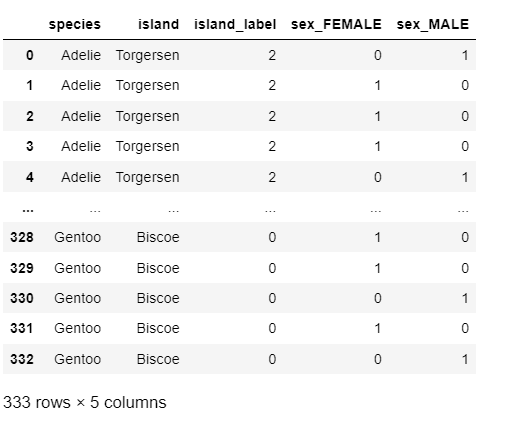

## Scaling
- 변수의 **단위를 변경**하고 싶거나, 변수의 **분포가 편향**되어 있을 경우, 변수 간의 관계가 잘 드러나지 않는 경우에는 변수 변환의 방법을 사용합니다.<br>

- 가장 자주 사용하는 방법으로는 Log 함수가 있고, 유사하지만 좀 덜 자주 사용되는 Square root를 취하는 방법도 있습니다.

참고 : https://homeproject.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81-Data-Scaling

### StandardScaler
- 각 feature의 평균을 0, 분산을 1로 변경합니다. 모든 특성들이 **같은 스케일**을 갖게 됩니다.

In [130]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, RobustScaler

In [131]:
scaled_data = data[['body_mass_g']]

standard_scaler = StandardScaler()
scaled_data['body_mass_scaled'] = standard_scaler.fit_transform(scaled_data[['body_mass_g']])

In [132]:
print('Mean:', scaled_data['body_mass_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_scaled'].std())

Mean: 2.360474178482315e-16
Standard Deviation: 1.0015048917468012


In [133]:
scaled_data

,body_mass_g,body_mass_scaled
0,3750.0,-0.568475
1,3800.0,-0.506286
2,3250.0,-1.190361
3,3450.0,-0.941606
4,3650.0,-0.692852
...,...,...
328,4925.0,0.892957
329,4850.0,0.799674
330,5750.0,1.919069
331,5200.0,1.234995


### MinMaxScaler
- 모든 feature가 **0과 1사이에 위치**하게 만듭니다.<br>
데이터가 2차원 셋일 경우, 모든 데이터는 x축의 0과 1 사이에, y축의 0과 1사이에 위치하게 됩니다.

In [134]:
minmax_scaler = MinMaxScaler()
scaled_data['body_mass_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['body_mass_g']])

In [135]:
print('Mean:', scaled_data['body_mass_min_max_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_min_max_scaled'].std())

Mean: 0.4186269602936271
Standard Deviation: 0.2236710560952491


In [136]:
scaled_data

,body_mass_g,body_mass_scaled,body_mass_min_max_scaled
0,3750.0,-0.568475,0.291667
1,3800.0,-0.506286,0.305556
2,3250.0,-1.190361,0.152778
3,3450.0,-0.941606,0.208333
4,3650.0,-0.692852,0.263889
...,...,...,...
328,4925.0,0.892957,0.618056
329,4850.0,0.799674,0.597222
330,5750.0,1.919069,0.847222
331,5200.0,1.234995,0.694444


### RobustScaler
- 모든 특성들이 **같은 크기**를 갖는다는 점에서 StandardScaler와 비슷하지만, 평균과 분산 대신 **median과 quartile**을 사용합니다.
- RobustScaler는 이상치에 영향을 받지 않습니다.

In [137]:
robust_scaler = RobustScaler()
scaled_data['body_mass_robust_scaled'] = robust_scaler.fit_transform(scaled_data[['body_mass_g']])

In [138]:
print('Mean:', scaled_data['body_mass_robust_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_robust_scaled'].std())

Mean: 0.12820984249555684
Standard Deviation: 0.6573190219942016


In [139]:
scaled_data

,body_mass_g,body_mass_scaled,body_mass_min_max_scaled,body_mass_robust_scaled
0,3750.0,-0.568475,0.291667,-0.244898
1,3800.0,-0.506286,0.305556,-0.204082
2,3250.0,-1.190361,0.152778,-0.653061
3,3450.0,-0.941606,0.208333,-0.489796
4,3650.0,-0.692852,0.263889,-0.326531
...,...,...,...,...
328,4925.0,0.892957,0.618056,0.714286
329,4850.0,0.799674,0.597222,0.653061
330,5750.0,1.919069,0.847222,1.387755
331,5200.0,1.234995,0.694444,0.938776


### QuantileTransformer
- feature가 uniform distribution을 따르도록 scale합니다.
- RobustScaler처럼 이상치에 영향을 받지 않습니다.

참고 : https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [140]:
qtrans = QuantileTransformer()
scaled_data['body_mass_q_trans_uniform'] = qtrans.fit_transform(scaled_data[['body_mass_g']])

In [141]:
print('Mean:', scaled_data['body_mass_q_trans_uniform'].mean())
print('Standard Deviation:', scaled_data['body_mass_q_trans_uniform'].std())

Mean: 0.49970150873765257
Standard Deviation: 0.2900598005184908


In [143]:
scaled_data

,body_mass_g,body_mass_scaled,body_mass_min_max_scaled,body_mass_robust_scaled,body_mass_q_trans_uniform
0,3750.0,-0.568475,0.291667,-0.244898,0.355422
1,3800.0,-0.506286,0.305556,-0.204082,0.393072
2,3250.0,-1.190361,0.152778,-0.653061,0.087349
3,3450.0,-0.941606,0.208333,-0.489796,0.183735
4,3650.0,-0.692852,0.263889,-0.326531,0.292169
...,...,...,...,...,...
328,4925.0,0.892957,0.618056,0.714286,0.787651
329,4850.0,0.799674,0.597222,0.653061,0.766566
330,5750.0,1.919069,0.847222,1.387755,0.966867
331,5200.0,1.234995,0.694444,0.938776,0.847892


### 스케일링 하는 이유 확인

In [144]:
# X_train과 X_test를 StandardScaler 스케일러로 스케일링 하기
# 스케일링한 X_train과 X_test의 변수명은 각각 X_train_scale, X_test_scale로 한다

#from ! import
#StandardSclaer()
#fit_transform(X_train)
#.transform(X-test)

In [145]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target,  random_state= 1422)

In [146]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
print("test accuracy before scaling : %0.3f" %(svc.score(X_test, y_test)))

X_train_scale = standard_scaler.fit_transform(X_train)
X_test_scale = standard_scaler.fit_transform(X_test)

svc.fit(X_train_scale, y_train)
print("test accuracy after scaling : %0.3f" %(svc.score(X_test_scale, y_test)))

test accuracy before scaling : 0.902
test accuracy after scaling : 0.958


#### (참고)Normalizer
StandardScaler, RobustScaler, MinMaxScaler가 각 columns의 통계치를 이용한다면 Normalizer는 row마다 각각 정규화됩니다. Normalizer는 유클리드 거리가 1이 되도록 데이터를 조정합니다. (유클리드 거리는 두 점 사이의 거리를 계산할 때 쓰는 방법, L2 Distance)

## BINNING
- **연속형 변수를 범주형 변수로** 만드는 방법입니다. 
    - 예를 들어, 연봉 데이터가 수치로 존재하는 경우, 이를 100만원 미만, 101만원~200만원.. 하는 식으로 범주형 변수로 변환하는 것이죠.<br><br>

- Binning에는 특별한 원칙이 있는 것이 아니기 때문에, 분석가의 Business 이해도에 따라 창의적인 방법으로 Binning 할 수 있습니다.


In [147]:
# 0-40 low / 40-50 medium / 50-100 high
bin_data = data[['culmen_length_mm']]
bin_data['culmen_length_bin'] = pd.cut(data['culmen_length_mm'], bins=[0, 40, 50, 100], labels=["Low", "Mid", "High"])

In [148]:
bin_data

,culmen_length_mm,culmen_length_bin
0,39.1,Low
1,39.5,Low
2,40.3,Mid
3,36.7,Low
4,39.3,Low
...,...,...
328,47.2,Mid
329,46.8,Mid
330,50.4,High
331,45.2,Mid


## Transform
- 기존 존재하는 변수의 성질을 이용해 **다른 변수**를 만드는 방법입니다.
    - 예를 들어, 날짜 별 판매 데이터가 있다면 날짜 변수를 주중/주말로 나눈 변수를 추가한다든지, 여행지의 방문객 데이터의 경우 해당 일에 방문객 증감 여부 등을 추가하는 것이지요.<br><br>

- Transform에도 특별한 원칙이 있는 것은 아니며, 분석가의 Business 이해도에 따라 다양한 변수가 생성될 수 있습니다.
